##  Data Science & Business Analytics Task - 1
-- Given by Spark Foundation in Graduate Rotational Internship Program 
##### Author : Soumyadeep Sengupta


In this task we have to predict the percentage of marks that a student can expected to score based upon the number of hours they studied. some details of this task are given here below

- Language used: Python
- Superviced ML
- Regression Task


This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

`video solution : ` 

`Linked in Solution : `

##### Data Import and Pre-processing

In [1]:
# IMPORT  LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for filtering the warning
import warnings
warnings.filterwarnings('ignore')

# Lib for ML model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# READING DATA FROM REMOTE LINK
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data imported successfully")


data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# DATAFRAME INFORMATION
print(data.info())
print('data frame describe: \n',data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
data frame describe: 
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [4]:
# CHECK MISSING DATA
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

we can see there are no null values in the data set so we can proceed further

##### Ploting Hours vs Scores

Text(0.5, 1.0, 'Hours vs Score')

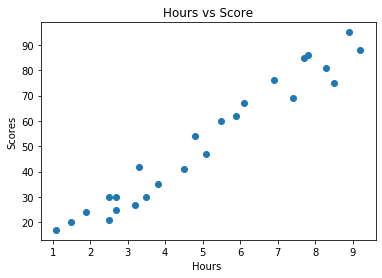

In [5]:
plt.scatter(x='Hours',y='Scores',data=data)
plt.xlabel('Hours ')
plt.ylabel('Scores')
plt.title('Hours vs Score')

In [6]:
corr = np.corrcoef(data.Hours,data.Scores)
print("Correalation matrix :\n",corr)

Correalation matrix :
 [[1.         0.97619066]
 [0.97619066 1.        ]]


here we can see the correlation matrix where we can see how hours and scores are dependent 

##### Plotting regressor plot to determine the relationship between Score and hours


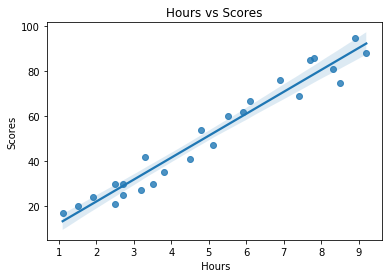

In [7]:
sns.regplot(x=data['Hours'],y=data['Scores'] ,data=data)
plt.title('Hours vs Scores')
plt.xlabel(' Hours')
plt.ylabel('Scores')
plt.show()

From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score. Here is a correlation coeffitient `.97` also which denotes it has a possitive correlation between `Hours and Scores`

##### Data Preparation 

In [8]:

X = data.iloc[:, :-1].values  #hours stored in X var
y = data.iloc[:, 1].values    #scores tored in y var

In [14]:
X_train , X_test , y_train ,y_test = train_test_split(X,y ,test_size = 0.2, random_state = 20)

##### Training Algorithm

In [15]:
## Linear regression 
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [16]:
##prediction

y_pred = model1.predict(X_test)
print("predicted Y: \n ",y_pred)

predicted Y: 
  [74.90959672 70.0740592  46.86347911 37.19240407 62.33719917]


In [17]:
# Compareing wit actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test , "Predicted_data":y_pred})
comp_df

,Actual_data,Predicted_data
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


##### Plotting Data

Text(0, 0.5, 'Scores')

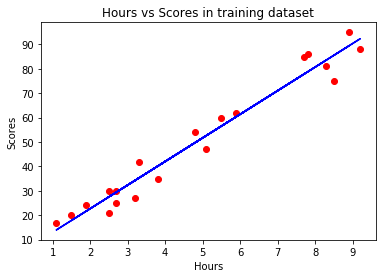

In [18]:
## visualization of training data in the data set
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train , model1.predict(X_train) , color = 'Blue')
plt.title("Hours vs Scores in training dataset")
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

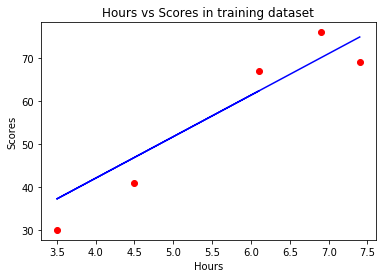

In [19]:
## visualization of training data in the data set
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test , model1.predict(X_test) , color = 'Blue')
plt.title("Hours vs Scores in training dataset")
plt.xlabel("Hours")
plt.ylabel("Scores")

##### Coefficient and Intercept

In [20]:

print ("Coefficient -", model1.coef_)
print ("Intercept - ", model1.intercept_)

Coefficient - [9.67107504]
Intercept -  3.3436414413187023



##### Estimating training and test score

In [21]:

print("Training Score:",model1.score(X_train,y_train))
print("Test Score:",model1.score(X_test,y_test))

Training Score: 0.9596371297881153
Test Score: 0.8880613623447959


##### Evaluating the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.910844306461269
Mean Squared Error: 35.57857659233007
Root Mean Squared Error: 5.964778000255339
R-2: 0.8880613623447959


In [ ]:
R-squared value is 88.8% which is really good. This means that the algorithm has proven to be good for the given data

##### Sample Question:
`What will be predicted score if a student study for 9.25 hrs in a day?`

In [23]:

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
value = model1.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(value[0]))


No of Hours = 9.25
Predicted Score = 92.80108554200024
